In [94]:
# import libraries and show diamonds dataframe

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
import theano
import theano.tensor as tt
import itertools
from IPython.core.pylabtools import figsize
pd.set_option('display.max_columns', 30)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

diamonds4 = pd.read_csv('diamondsfour.txt')

In [95]:

#diamonds4.drop(["Index"], axis=1, inplace = True)
diamonds4

,Shape,Carat,Color,Clarity,Cut,Depth,Table,Polish,Symmetry,Measurement,Lab Certification,Price
Asscher,1.02,H,VS1,NaN,67.5,63.0,Excellent,Very Good,5.60X5.51X3.72,GIA,US$5,296.0
Asscher,1.02,D,VS2,NaN,67.7,64.0,Excellent,Excellent,5.58X5.53X3.74,GIA,US$6,732.0
Asscher,1.02,E,VS1,NaN,60.4,76.0,Very Good,Very Good,5.93X5.89X3.56,GIA,US$6,487.0
Asscher,0.91,F,VS2,NaN,68.0,64.0,Excellent,Very Good,5.27X5.25X3.57,GIA,US$4,805.0
Asscher,2.21,F,VS1,NaN,67.4,63.0,Excellent,Very Good,7.16X7.11X4.79,GIA,US$29,207.0
Asscher,0.90,I,VS2,NaN,66.8,64.0,Excellent,Excellent,5.34X5.30X3.54,GIA,US$3,306.0
Asscher,0.90,F,VS1,NaN,67.9,64.0,Excellent,Excellent,5.25X5.21X3.54,GIA,US$4,355.0
Asscher,0.90,H,VVS2,NaN,68.8,64.0,Excellent,Very Good,5.30X5.18X3.56,GIA,US$3,593.0
Asscher,0.73,I,VS1,NaN,66.7,63.0,Very Good,Very Good,4.99X4.98X3.32,GIA,US$2,202.0
Asscher,0.90,I,VVS2,NaN,68.5,54.0,Excellent,Excellent,5.31X5.23X3.58,GIA,US$3,485.0


In [61]:
#Clean up the column and delete the $ sign as well as convert to a float
# diamonds5["Price"] = diamonds5['Price'].replace({'\$':'', ',': ''}, regex=True).astype(float)

In [86]:
diamonds5

,Shape,Carat,Cut,Color,Clarity,Polish,Symmetry,Lab_Certification,Price
0,1,0.30,1,1,1,1,1,GIA,126.0
1,2,0.18,2,2,1,2,2,GIA,129.0
2,3,0.19,2,3,2,3,3,GIA,130.0
3,2,0.23,2,4,3,4,3,GIA,134.0
4,2,0.20,3,5,3,1,4,GIA,147.0
5,2,0.18,3,1,2,2,1,GIA,152.0
6,1,0.18,3,6,3,2,2,GIA,154.0
7,2,0.18,1,6,4,1,1,GIA,156.0
8,2,0.18,2,7,1,2,1,GIA,156.0
9,3,0.27,3,1,4,4,5,GIA,157.0


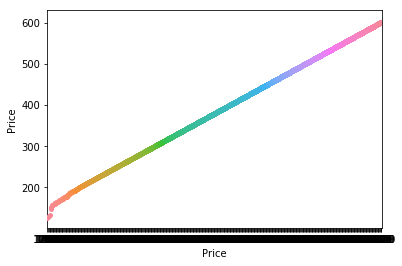

In [87]:
sns.stripplot(x="Price", y="Price", data=diamonds5, jitter=True)
plt.show();

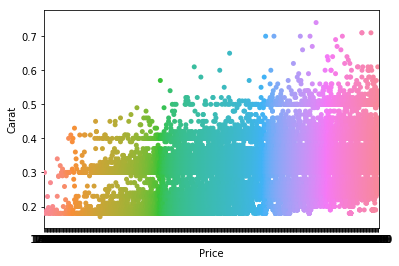

In [88]:
sns.stripplot(x="Price", y="Carat", data=diamonds5, jitter=True)
plt.show();

In [68]:
diamonds5['Shape'].value_counts()

2     27953
1      1022
3       763
5       549
7       538
4       306
8       190
9       179
6        74
10       20
Name: Shape, dtype: int64

In [70]:
diamonds5['Cut'].value_counts()

3    22137
1     6193
2     2790
4      474
Name: Cut, dtype: int64

In [71]:
diamonds5['Carat'].value_counts()

0.30    8608
0.23    2859
0.31    2499
0.40    1954
0.32    1536
0.24    1506
0.18    1417
0.33    1335
0.35    1275
0.34    1214
0.25     899
0.19     791
0.26     574
0.36     569
0.20     551
0.21     481
0.41     416
0.37     393
0.50     338
0.22     337
0.27     333
0.42     211
0.38     196
0.28     190
0.43     156
0.29     141
0.39     114
0.45     113
0.44     110
0.51     103
0.46      77
0.52      52
0.47      36
0.48      34
0.53      30
0.54      28
0.49      20
0.56      17
0.55      15
0.58      11
0.60      11
0.57      10
0.61       7
0.70       5
0.62       3
0.64       3
0.59       3
0.71       3
0.66       2
0.67       2
0.63       2
0.17       1
0.69       1
0.65       1
0.74       1
Name: Carat, dtype: int64

In [72]:
diamonds5['Color'].value_counts()

6    7196
7    5413
2    5080
8    3557
9    2720
3    2592
4    2107
1    2014
5     915
Name: Color, dtype: int64

In [73]:
diamonds5['Clarity'].value_counts()

2    5225
7    4869
5    4717
3    4528
6    4328
4    4192
8    2045
1    1608
9      82
Name: Clarity, dtype: int64

In [74]:
diamonds5['Polish'].value_counts()

1    23222
2     6741
3     1579
4       45
5        5
7        1
6        1
Name: Polish, dtype: int64

In [75]:
diamonds5['Symmetry'].value_counts()

4    19352
1     8726
2     2988
3      510
5       10
6        7
7        1
Name: Symmetry, dtype: int64

In [11]:
diamonds5.Shape.unique()

array(['Pear', 'Round', 'Princess', 'Emerald', 'Marquise', 'Radiant',
       'Oval', 'Cushion', 'Heart', 'Asscher'], dtype=object)

In [13]:
diamonds5.Cut.unique()

array(['Very Good', 'Good', 'Excellent', 'Fair'], dtype=object)

In [14]:
diamonds5.Color.unique()

array(['K', 'F', 'I', 'J', 'M', 'E', 'L', 'D', 'G', 'H'], dtype=object)

In [63]:
def replace_shape(Shape):
    '''
    This function codes the highest category name attained.
    
    '''
    if Shape == 'Pear':
        return 1
    elif Shape == 'Round':
        return 2
    elif Shape == 'Princess':
        return 3
    elif Shape == 'Emerald':
        return 4
    elif Shape == 'Marquise':
        return 5
    elif Shape == 'Radiant':
        return 6
    elif Shape == 'Oval':
        return 7
    elif Shape == 'Cushion':
        return 8
    elif Shape == 'Heart':
        return 9
    elif Shape == 'Asscher':
        return 10
    
def replace_cut(Cut):
    if Cut == 'Very Good':
        return 1
    elif Cut == 'Good':
        return 2
    elif Cut == 'Excellent':
        return 3
    elif Cut == 'Fair':
        return 4
    
def replace_color(Color):
    if Color == 'K':
        return 1
    elif Color == 'F':
        return 2
    elif Color == 'I':
        return 3
    elif Color == 'J':
        return 4
    elif Color == 'M':
        return 5
    elif Color == 'E':
        return 6
    elif Color == 'L':
        return 6
    elif Color == 'D':
        return 7
    elif Color == 'G':
        return 8
    elif Color == 'H':
        return 9
    
def replace_clarity(Clarity):
    if Clarity == 'I1':
        return 1
    elif Clarity == 'VS1':
        return 2
    elif Clarity == 'SI1':
        return 3
    elif Clarity == 'SI2':
        return 4
    elif Clarity == 'VVS2':
        return 5
    elif Clarity == 'VS2':
        return 6
    elif Clarity == 'VVS1':
        return 7
    elif Clarity == 'IF':
        return 8
    elif Clarity == 'FL':
        return 9
    
def replace_polish(Polish):
    if Polish == 'Excellent':
        return 1
    elif Polish == 'Very Good':
        return 2
    elif Polish == 'Good':
        return 3
    elif Polish == 'Fair':
        return 4
    elif Polish == '-------':
        return 5
    elif Polish == 'Poor':
        return 6
    elif Polish == 'Ideal':
        return 7
    
def replace_symmetry(Symmetry):
    if Symmetry == 'Very Good':
        return 1
    elif Symmetry == 'Good':
        return 2
    elif Symmetry == 'Fair':
        return 3
    elif Symmetry == 'Excellent':
        return 4
    elif Symmetry == 'Poor':
        return 5
    elif Symmetry == '-------':
        return 6
    elif Symmetry == 'Ideal':
        return 7
    
diamonds5['Shape'] = diamonds5['Shape'].apply(lambda x: replace_shape(x))
diamonds5['Cut'] = diamonds5['Cut'].apply(lambda x: replace_cut(x))
diamonds5['Color'] = diamonds5['Color'].apply(lambda x: replace_color(x))
diamonds5['Clarity'] = diamonds5['Clarity'].apply(lambda x: replace_clarity(x))
diamonds5['Polish'] = diamonds5['Polish'].apply(lambda x: replace_polish(x))
diamonds5['Symmetry'] = diamonds5['Symmetry'].apply(lambda x: replace_symmetry(x))

diamonds5  

,Shape,Carat,Cut,Color,Clarity,Polish,Symmetry,Lab Certification,Price
0,1,0.30,1,1,1,1,1,GIA,126.0
1,2,0.18,2,2,1,2,2,GIA,129.0
2,3,0.19,2,3,2,3,3,GIA,130.0
3,2,0.23,2,4,3,4,3,GIA,134.0
4,2,0.20,3,5,3,1,4,GIA,147.0
5,2,0.18,3,1,2,2,1,GIA,152.0
6,1,0.18,3,6,3,2,2,GIA,154.0
7,2,0.18,1,6,4,1,1,GIA,156.0
8,2,0.18,2,7,1,2,1,GIA,156.0
9,3,0.27,3,1,4,4,5,GIA,157.0


In [81]:
#diamonds5.to_csv(r'C:/Users/AaronDataScienceComp/Desktop/diamonds5a.txt')

In [15]:
diamonds5.Clarity.unique()

array(['I1', 'VS1', 'SI1', 'SI2', 'VVS2', 'VS2', 'VVS1', 'IF', 'FL'],
      dtype=object)

In [16]:
diamonds5.Polish.unique()

array(['Excellent', 'Very Good', 'Good', 'Fair', '-------', 'Poor',
       'Ideal'], dtype=object)

In [17]:
diamonds5.Symmetry.unique()

array(['Very Good', 'Good', 'Fair', 'Excellent', 'Poor', '-------',
       'Ideal'], dtype=object)

In [76]:
price = diamonds5['Price']
data = diamonds5[['Shape', 'Carat', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry']]
data['Price'] = price
data.corr()['Price'].sort_values(ascending=False)

Price       1.000000
Carat       0.269591
Symmetry    0.154031
Cut         0.114213
Clarity     0.104783
Color       0.075756
Shape       0.020816
Polish     -0.160528
Name: Price, dtype: float64